## Capstone 3: Spotify - Similar songs with clustering 

In [1]:
# Importing all necessary libraries for our analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
# Imported dataset

data_url = 'https://github.com/jlc0523/Capstone3-Spotfiy2/blob/main/SpotifyFeatures.csv?raw=true'

df_spot = pd.read_csv(data_url)

In [3]:
# Taking a look at the dataset

df_spot.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# Mean and median are nicely close together except for instrumentalness
# Could be due to the amount of 0 values. Might have to get rid of those rows
# OR, we could utilize dimensionality reduction techniques, like PCA

df_spot.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [5]:
df_spot.describe(include='O')

,genre,artist_name,track_name,track_id,key,mode,time_signature
count,232725,232725,232725,232725,232725,232725,232725
unique,27,14564,148615,176774,12,2,5
top,Comedy,Giuseppe Verdi,Home,0wY9rA9fJkuESyYm9uzVK5,C,Major,4/4
freq,9681,1394,100,8,27583,151744,200760


In [6]:
#no null values. nice.

df_spot.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
# Taking a look at the datatypes of each column

df_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [9]:
df_spot['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

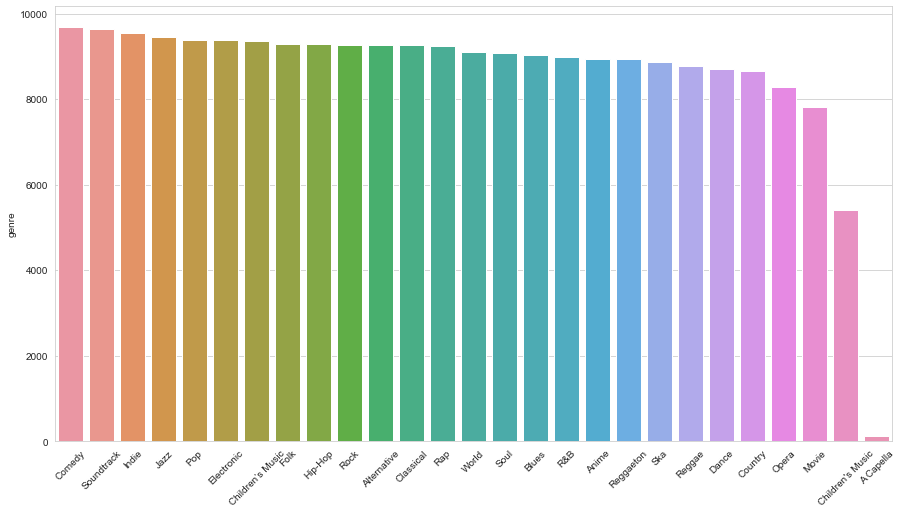

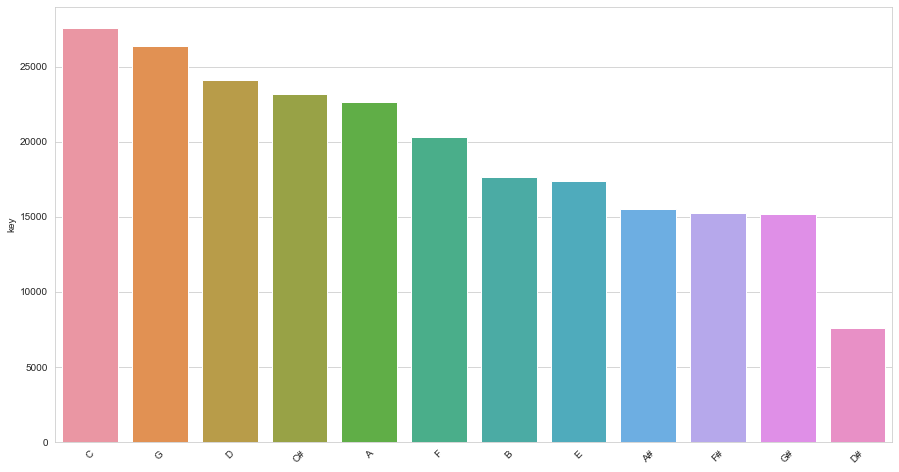

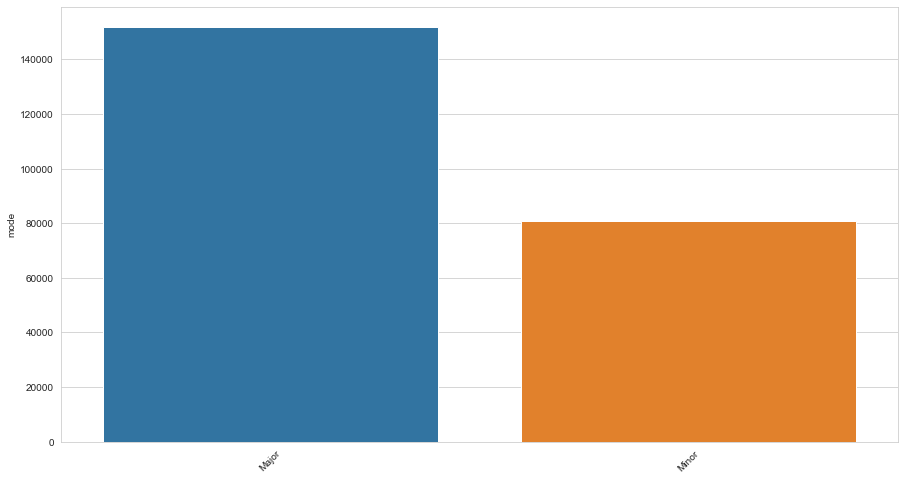

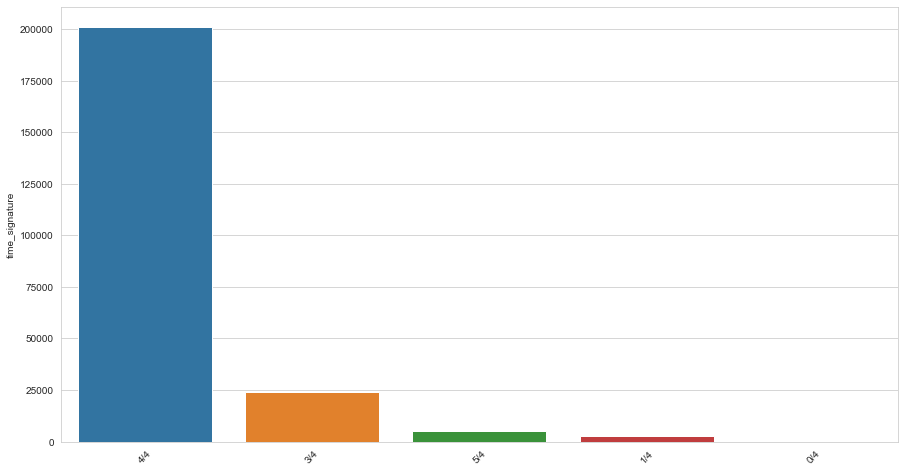

In [10]:
cols = df_spot[['genre','key','mode','time_signature']].columns.values

for col in cols:
    plt.figure(figsize=(15,8))
    sns.set_style('whitegrid')
    sns.barplot(x = df_spot[col].value_counts().index, y=df_spot[col].value_counts())
    plt.xticks(rotation = 45)
    plt.show()

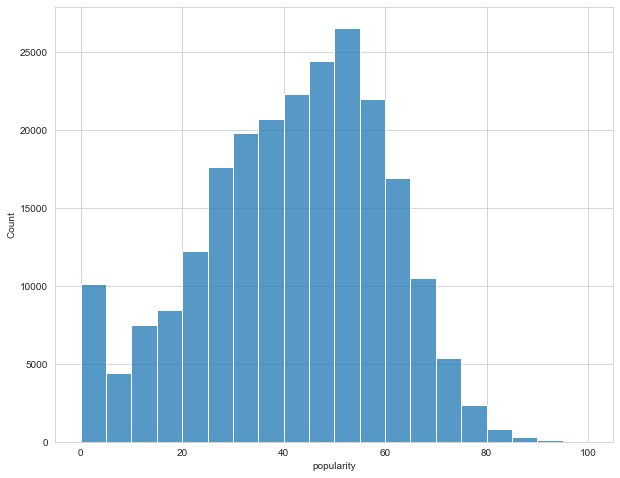

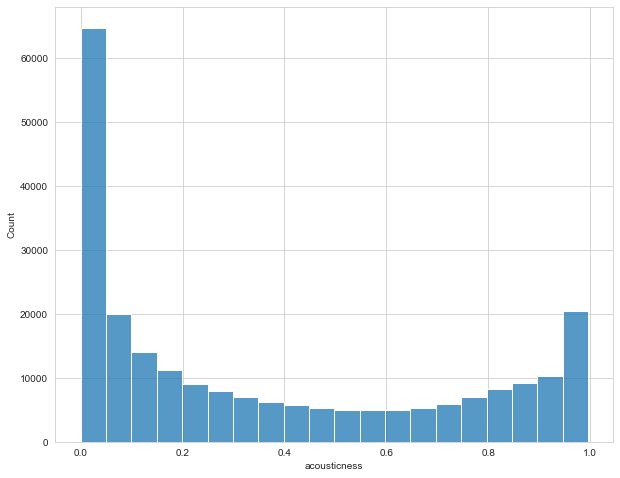

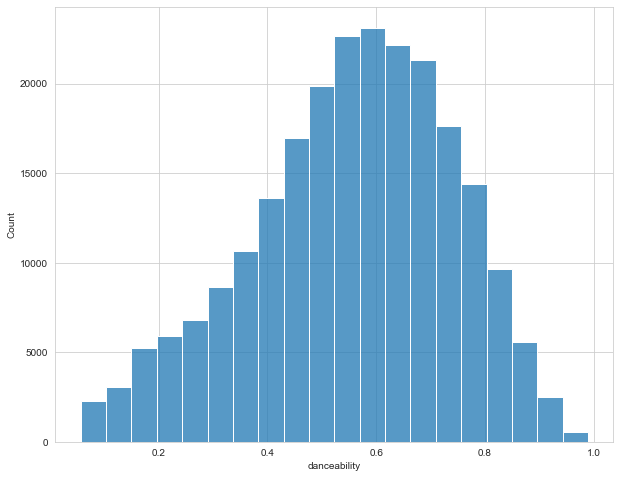

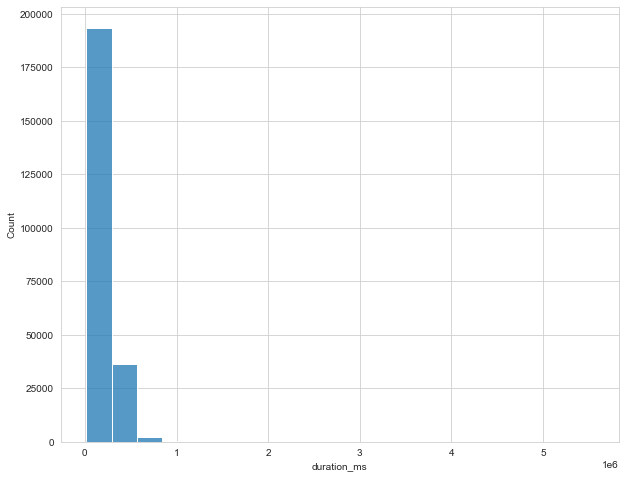

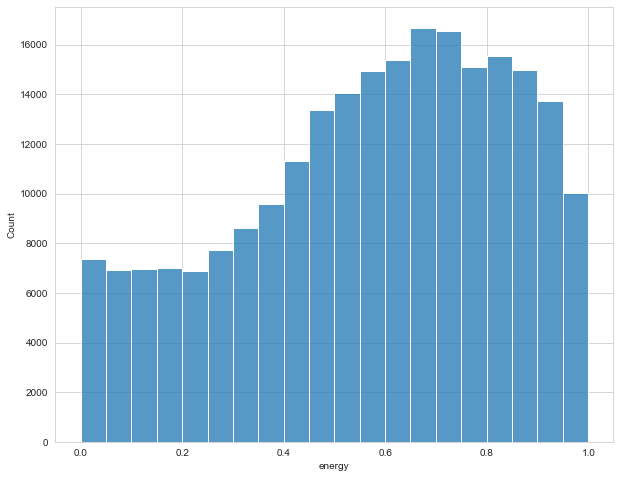

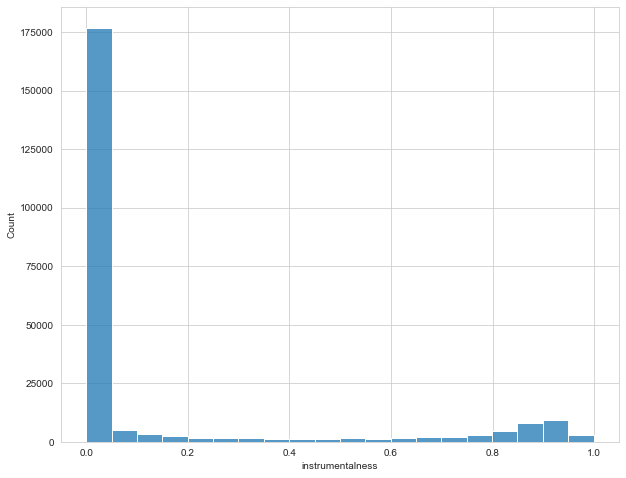

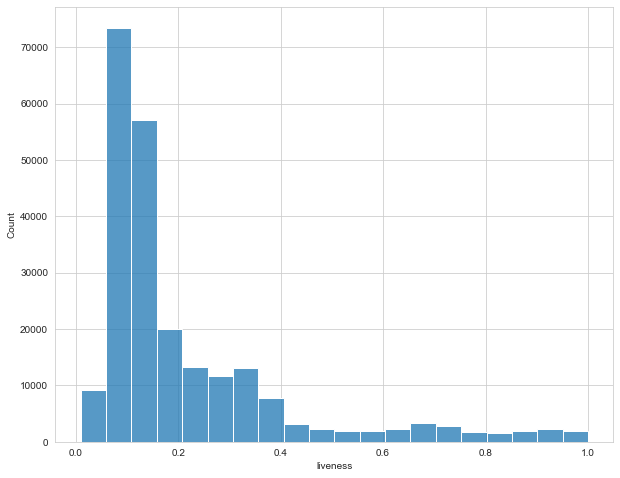

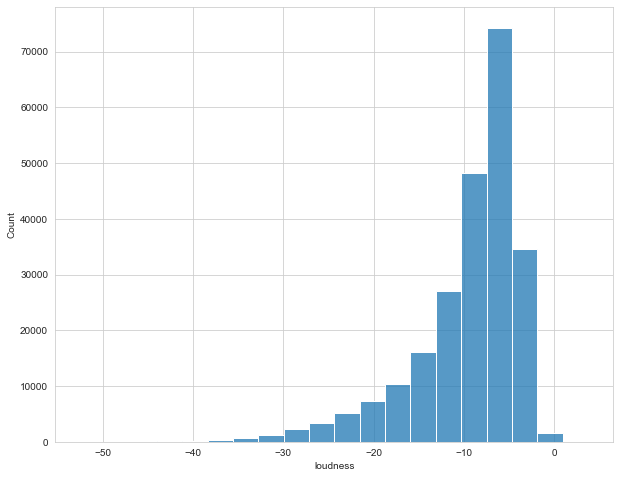

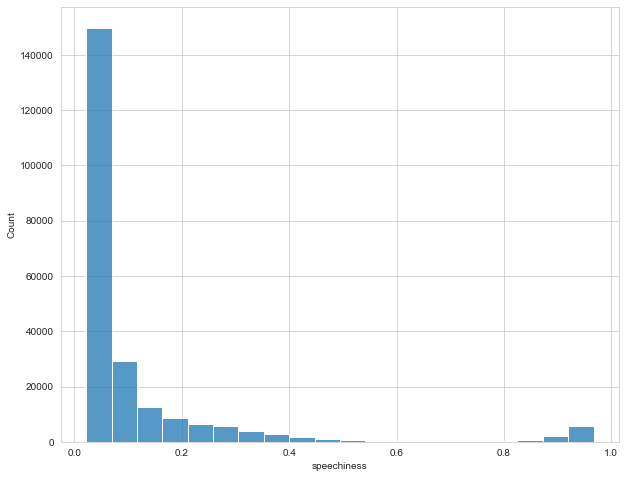

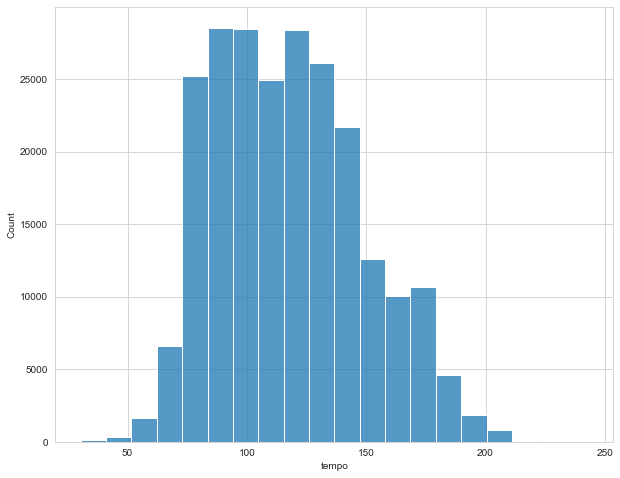

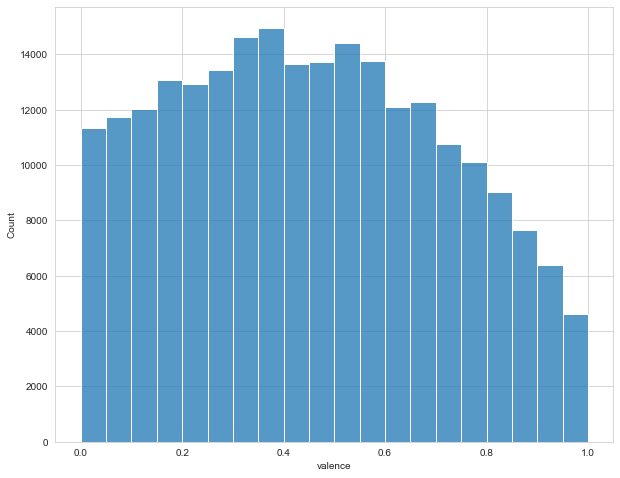

In [183]:
cols = df_spot.select_dtypes(include='number')

for col in cols:
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.histplot(data=df_spot, x=col, bins=20)
    plt.show()

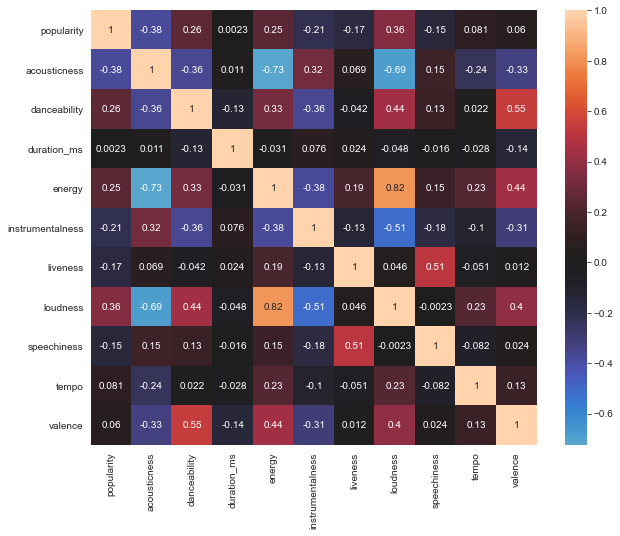

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df_spot.corr(),annot=True, center=0)
plt.show()

## Preprocessing

In [12]:
X = df_spot.select_dtypes(include='number')

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.26100656,  0.6833763 , -0.89093479, ..., -0.36796995,
         1.5956073 ,  1.38074423],
       [-2.20603102, -0.34546718,  0.19199369, ..., -0.18308213,
         1.82325339,  1.38843461],
       [-2.09607995,  1.6445698 ,  0.58529607, ..., -0.45583209,
        -0.5883258 , -0.33421214],
       ...,
       [ 0.32284371,  1.50081358, -0.20130869, ...,  0.14680516,
        -1.08520529,  1.37689903],
       [ 0.1579171 , -0.30036719,  1.02708778, ...,  0.13602453,
        -0.57075233,  0.13105629],
       [-0.33686274, -0.7646152 ,  1.09712793, ..., -0.49625945,
        -0.12199762,  0.09260435]])

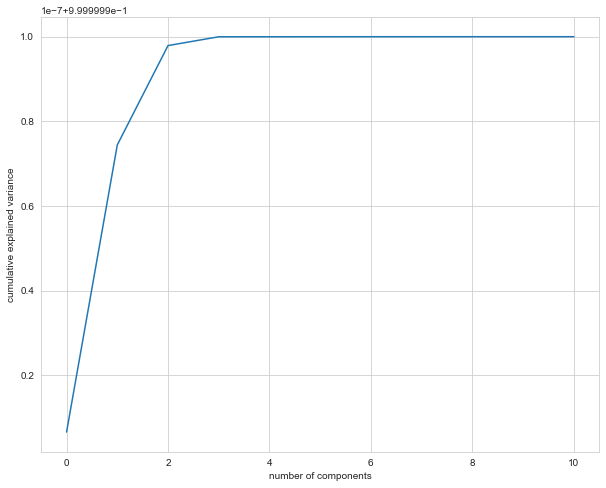

In [20]:
# From the explained variance ratio chart, we'll able to
# preserve 95% of our data variance with 2 components

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(10,8))
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [28]:
inertia_score = []
for i in range (1,31):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X_pca)
    inertia_score.append(kmeans.inertia_)

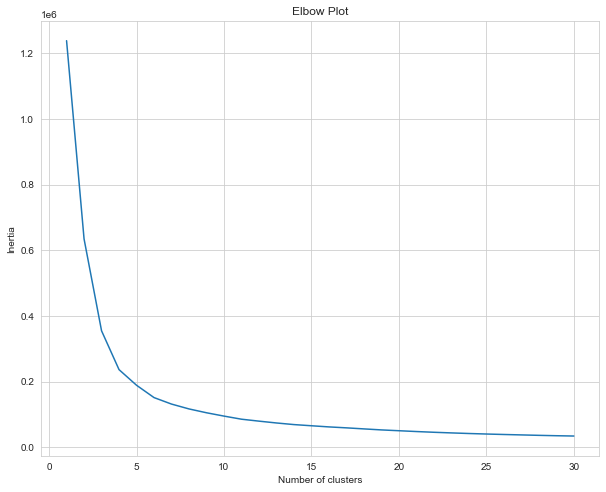

In [29]:
# based on our inertia 'elbow' plot, our data distribution 
# recommends using 6 or 7 clusters.
# however, for the outcome of our question, we will need a lot more than that

plt.figure(figsize=(10,8))
plt.plot(range(1,31), inertia_score)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [178]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Modeling: K-means

In [117]:
# K-means model creation with 500 clusters
# Disclaimer: This will take a while!

kmeans = KMeans(n_clusters=500, max_iter=300)
y_kmeans = kmeans.fit_predict(X_pca)

print(X_pca.shape)
print(y_kmeans.shape)

(232725, 2)
(232725,)


In [118]:
# Make a new temporary dataframe with components and cluster values

pca_df2 = pd.DataFrame(columns=['pc0','pc1','cluster'])
pca_df2['pca0'] = X_pca[:,0]
pca_df2['pca1'] = X_pca[:,1]
pca_df2['cluster'] = y_kmeans

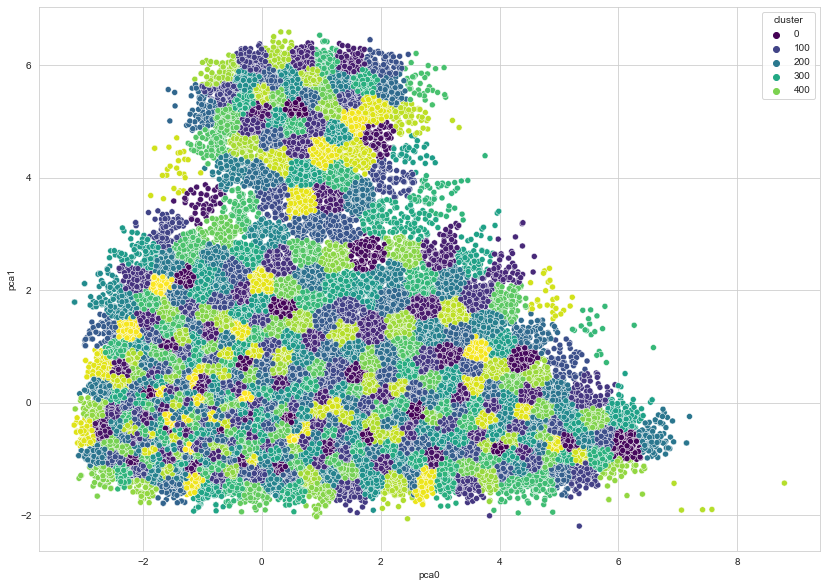

In [128]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='pca0', y='pca1', data=pca_df2, hue='cluster', palette='viridis')
plt.show()

In [120]:
pca_df2['cluster'].describe()

count    232725.000000
mean        245.568688
std         144.644399
min           0.000000
25%         122.000000
50%         243.000000
75%         367.000000
max         499.000000
Name: cluster, dtype: float64

In [156]:
merged_df = pd.DataFrame(columns=['artist_name','track_name','pca0','pca1','track_id','cluster'])
merged_df['track_id'] = df_spot['track_id']
merged_df['artist_name'] = df_spot['artist_name']
merged_df['track_name'] = df_spot['track_name']
merged_df['genre'] = df_spot['genre']
merged_df['pca0'] = pca_df2['pca0']
merged_df['pca1'] = pca_df['pca1']
merged_df['cluster'] = pca_df2['cluster'].astype('int64')

In [122]:
merged_df.head()

,artist_name,track_name,pca0,pca1,track_id,cluster
0,Henri Salvador,C'est beau de faire un Show,-0.990450,-0.830608,0BRjO6ga9RKCKjfDqeFgWV,392
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),-1.209613,0.381017,0BjC1NfoEOOusryehmNudP,241
2,Joseph Williams,Don't Let Me Be Lonely Tonight,2.112402,-1.861193,0CoSDzoNIKCRs124s9uTVy,138
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,1.954505,0.169783,0Gc6TVm52BwZD07Ki6tIvf,352
4,Fabien Nataf,Ouverture,2.935588,-0.376869,0IuslXpMROHdEPvSl1fTQK,377


In [165]:
# function for recommending songs based on similarity clusters

def song_recommend(track_name, artist_name, limit):
    cluster_number = merged_df.loc[(merged_df['track_name']==track_name)&(merged_df['artist_name']==artist_name), 'cluster']
    cluster_df = merged_df.loc[merged_df['cluster']==cluster_number.values[0]]
    songs = cluster_df[['track_name','artist_name','genre']].sample(n=limit)
    return songs

In [158]:
song_recommend('American Idiot', 'Green Day', 10)

,track_name,artist_name,genre
6404,In For The Kill,La Roux,Alternative
18537,SMS (Bangerz),Miley Cyrus,Dance
68260,Gettin' Jiggy Wit It,Will Smith,Hip-Hop
69798,You Can Do It - Feat. Mack 10 And Ms Toi,Ice Cube,Hip-Hop
5254,The Seed (2.0),The Roots,Alternative
69301,Xxplosive,Dr. Dre,Hip-Hop
66620,Keanu Reeves,Logic,Hip-Hop
5306,Daft Punk Is Playing at My House,LCD Soundsystem,Alternative
114991,Xxplosive,Dr. Dre,Rap
150191,Xxplosive,Dr. Dre,Pop


In [159]:
song_recommend('The Middle', 'Zedd', 10)

,track_name,artist_name,genre
152376,Can't Feel My Face,The Weeknd,R&B
155668,Enola Gay - Remastered,Orchestral Manoeuvres In The Dark,Rock
108977,The Difference,Tyler Rich,Pop
111021,What You Know,Two Door Cinema Club,Pop
97050,S.E.X.,Nickelback,Children’s Music
212300,Play It Again,Luke Bryan,Country
113780,Break Up Every Night,The Chainsmokers,Pop
150470,By Your Side,Jonas Blue,Pop
65156,Middle of the Road - 2007 Remaster,Pretenders,Folk
212727,Pickin' Wildflowers,Keith Anderson,Country


In [160]:
df_spot.loc[(df_spot['track_name']=='The Middle')&(df_spot['artist_name']=='Zedd')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9077,Dance,Zedd,The Middle,09IStsImFySgyp0pIQdqAc,87,0.171,0.753,184732,0.657,0.0,G,0.112,-3.061,Major,0.0449,107.01,4/4,0.437
107907,Pop,Zedd,The Middle,09IStsImFySgyp0pIQdqAc,88,0.171,0.753,184732,0.657,0.0,G,0.112,-3.061,Major,0.0449,107.01,4/4,0.437


In [161]:
df_spot.loc[(df_spot['track_name']=='Just the Way You Are')&(df_spot['artist_name']=='Bruno Mars')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9097,Dance,Bruno Mars,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,80,0.0151,0.637,220733,0.843,0.0,F,0.0876,-5.413,Major,0.0432,109.012,4/4,0.434
108001,Pop,Bruno Mars,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,80,0.0151,0.637,220733,0.843,0.0,F,0.0876,-5.413,Major,0.0432,109.012,4/4,0.434


## Incorporating genre

In [174]:
# we will incorporate genre to our model
# starting with one hot encoding our genres

genre_df = pd.get_dummies(df_spot['genre'], drop_first=True, dtype='int64')

genre_df['pca0'] = X_pca[:,0]
genre_df['pca1'] = X_pca[:,1]
genre_df.head()

,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,...,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,pca0,pca1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.990450,0.999392
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.209613,0.273042
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.112402,0.353162
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.954505,-0.186844
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.935588,0.391576


In [ ]:
# feed it into the model with same parameters

kmeans = KMeans(n_clusters=500, max_iter=300)
y_genre = kmeans.fit_predict(genre_df)

print(genre_df.shape)
print(y_genre.shape)

In [175]:
genre_df['cluster'] = y_genre

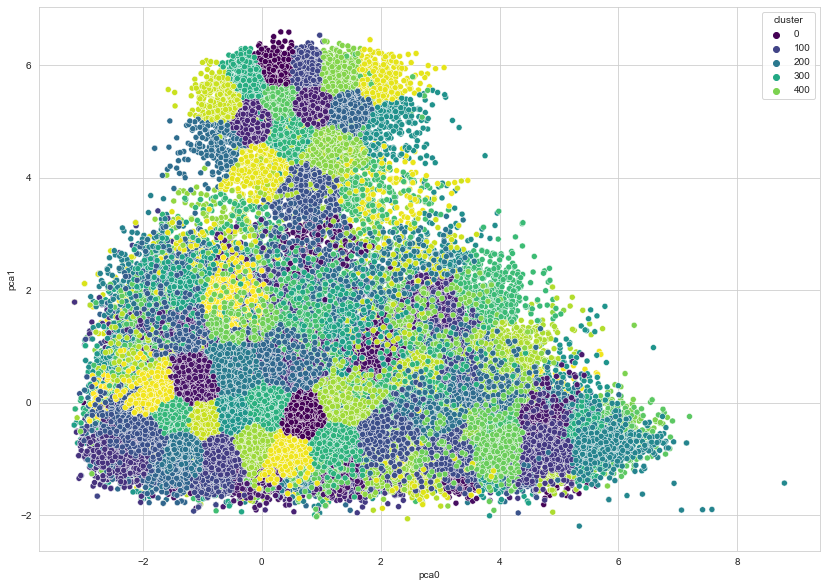

In [176]:
# This looks different than our initial K-means, especially with
# overlapping clusters

plt.figure(figsize=(14,10))
sns.scatterplot(x='pca0', y='pca1', data=genre_df, hue='cluster', palette='viridis')
plt.show()

In [147]:
merged2_df = pd.DataFrame(columns=['artist_name','track_name','genre','pca0','pca1','track_id','cluster'])
merged2_df['track_id'] = df_spot['track_id']
merged2_df['artist_name'] = df_spot['artist_name']
merged2_df['track_name'] = df_spot['track_name']
merged2_df['genre'] = df_spot['genre']
merged2_df['pca0'] = genre_df['pca0']
merged2_df['pca1'] = genre_df['pca1']
merged2_df['cluster'] = y_genre.astype('int64')

In [177]:
merged2_df.head()

,artist_name,track_name,genre,pca0,pca1,track_id,cluster
0,Henri Salvador,C'est beau de faire un Show,Movie,-0.990450,0.999392,0BRjO6ga9RKCKjfDqeFgWV,395
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),Movie,-1.209613,0.273042,0BjC1NfoEOOusryehmNudP,155
2,Joseph Williams,Don't Let Me Be Lonely Tonight,Movie,2.112402,0.353162,0CoSDzoNIKCRs124s9uTVy,215
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,Movie,1.954505,-0.186844,0Gc6TVm52BwZD07Ki6tIvf,215
4,Fabien Nataf,Ouverture,Movie,2.935588,0.391576,0IuslXpMROHdEPvSl1fTQK,452


In [ ]:
def song_recommend_genre(track_name, artist_name, limit):
    cluster_number = merged2_df.loc[(merged2_df['track_name']==track_name)&(merged2_df['artist_name']==artist_name), 'cluster']
    cluster_df = merged2_df.loc[merged2_df['cluster']==cluster_number.values[0]]
    songs = cluster_df[['track_name','artist_name','genre']].sample(n=limit)
    return songs

In [166]:
song_recommend_genre('Almost Easy', 'Avenged Sevenfold', 10)

,track_name,artist_name,genre
2816,Not Good Enough For Truth In Cliche',Escape the Fate,Alternative
2825,Fire Walk With Me,The Black Keys,Alternative
5934,Over,Syd,Alternative
10145,"Snap Your Fingers, Snap Your Neck",Prong,Alternative
5958,Girlfriend,Matthew Sweet,Alternative
1256,Addicted,Saving Abel,Alternative
1633,HEY CHILD,X Ambassadors,Alternative
6096,Punch Bag,YONAKA,Alternative
27671,Golden Cage,The Whitest Boy Alive,Alternative
3166,Gronlandic Edit,of Montreal,Alternative


In [184]:
song_recommend_genre('Payphone', 'Maroon 5', 10)

,track_name,artist_name,genre
151590,Ni Mis Padres Saben Que Rollo,Grupo Codiciado,Pop
112727,She's Out Of Her Mind,blink-182,Pop
149771,Woke Up In Japan,5 Seconds of Summer,Pop
152018,Drippin',NCT DREAM,Pop
108931,Year 3000,Jonas Brothers,Pop
150639,Ruff Ryders' Anthem - Re-Recorded,DMX,Pop
112342,Why Don't You Get A Job,The Offspring,Pop
149412,A Partir De Hoy,David Bisbal,Pop
113471,Side Effects - Fedde Le Grand Remix,The Chainsmokers,Pop
150217,Stainless,Logic,Pop


In [188]:
df_spot.loc[(df_spot['track_name']=='Payphone')&(df_spot['artist_name']=='Maroon 5')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
108479,Pop,Maroon 5,Payphone,1LmN9SSHISbtp9LoaR5ZVJ,72,0.0136,0.739,231387,0.756,0.0,E,0.37,-4.828,Major,0.0394,110.028,4/4,0.523


In [189]:
df_spot.loc[(df_spot['track_name']=='Woke Up In Japan')&(df_spot['artist_name']=='5 Seconds of Summer')]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
15840,Dance,5 Seconds of Summer,Woke Up In Japan,5FA9XC36IlV9bnhMqqzNc9,62,0.0119,0.677,157002,0.863,0.0,G,0.146,-3.785,Major,0.109,126.909,4/4,0.647
149771,Pop,5 Seconds of Summer,Woke Up In Japan,5FA9XC36IlV9bnhMqqzNc9,62,0.0119,0.677,157002,0.863,0.0,G,0.146,-3.785,Major,0.109,126.909,4/4,0.647


In [196]:
song_recommend_genre('Indestructible', 'Disturbed', 10)

,track_name,artist_name,genre
1485,Humility (feat. George Benson),Gorillaz,Alternative
6207,Petals,TOPS,Alternative
11805,Loading Zones,Kurt Vile,Alternative
1207,Safe And Sound,Capital Cities,Alternative
6622,Impossible,Manafest,Alternative
10982,Behind Closed Doors,Rise Against,Alternative
6465,(If You're Wondering If I Want You To) I Want ...,Weezer,Alternative
5105,Ain't My Last Dance,Five Finger Death Punch,Alternative
680,Smells Like Teen Spirit,Nirvana,Alternative
11895,El Microbito,Fobia,Alternative


## Conclusion

For now, this model works well for me. It suggests a number of songs that are similar to the input song, with and without consideration of genre (I prefer the one with genre), but I wouldn't say this model does well without exploring all the options. 

I would've liked to try a different clustering algorhithm, such as DBSCAN to see how that would change the clustering, and also try a different dimensionality reduction.
